---
title: Getting organization units from DHIS2 Web API (asynchronous)
short_title: Getting org units from DHIS2 
---

Downloading organization units from the DHIS2 Web API

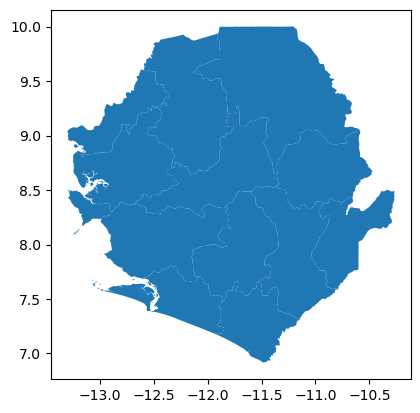

In [44]:
import asyncio
import geopandas
import json
import earthkit.data
import io
from dhis2_client import DHIS2AsyncClient, Settings

In [45]:
settings = Settings(base_url='http://localhost:8080', username='admin', password='district')

In [61]:
async def get_org_units():
  async with DHIS2AsyncClient.from_settings(settings) as client:
    info = await client.get_system_info()
    print("DHIS2:", info.version, info.contextPath)
    org_units_dict = await client.get("/api/organisationUnits.geojson", params={"level": 2}) 
    org_units_json = json.dumps(org_units_dict)
      
    # org_units_stream = io.StringIO(org_units_json)
    # data = earthkit.data.from_source("stream", org_units_stream, read_all=True) 
    # print("data", data)
      
    gdf = geopandas.read_file(org_units_json, use_arrow=True)
    gdf.plot()

    # print(f"Current CRS: {gdf.crs}")

    # https://github.com/ecmwf/earthkit-data/issues/800
    # org_units_stream = io.StringIO(org_units_json)  
    # features = earthkit.data.from_source("stream", org_units_stream)
    # print('DONE', features) 


Get the event loop and run the main asynchronous function. [About running asynchronous code in Jupyter Notebook](https://medium.com/@dpzhcmy/running-asynchronous-code-in-jupyter-notebooks-managing-event-loops-b9696a596ce4).

In [62]:
loop = asyncio.get_event_loop()
loop.create_task(get_org_units())

<Task pending name='Task-51' coro=<get_org_units() running at /var/folders/5w/c_fm8msx2gb49y7ygv1wxklr0000gn/T/ipykernel_3234/3635901391.py:1>>

{"method": "GET", "path": "/api/system/info", "request_id": "93770929-dda5-48bc-acff-9ef1e682f6f5", "event": "http.request", "level": "info", "timestamp": "2025-09-11T14:41:42.040963Z"}
INFO:httpx:HTTP Request: GET http://localhost:8080/api/system/info "HTTP/1.1 200 "
{"status": 200, "path": "/api/system/info", "request_id": "93770929-dda5-48bc-acff-9ef1e682f6f5", "event": "http.response", "level": "info", "timestamp": "2025-09-11T14:41:42.171176Z"}
DHIS2: 2.40.0.1 http://localhost:8080/
{"method": "GET", "path": "/api/organisationUnits.geojson", "request_id": "18002510-9f7c-4e09-9842-a12e97989139", "event": "http.request", "level": "info", "timestamp": "2025-09-11T14:41:42.172842Z"}
INFO:httpx:HTTP Request: GET http://localhost:8080/api/organisationUnits.geojson?level=2 "HTTP/1.1 200 "
{"status": 200, "path": "/api/organisationUnits.geojson", "request_id": "18002510-9f7c-4e09-9842-a12e97989139", "event": "http.response", "level": "info", "timestamp": "2025-09-11T14:41:42.196921Z"}


Exception ignored from cffi callback <function pyread_callback at 0x17f2eedd0>:
Traceback (most recent call last):
  File "/Users/mastermaps/miniforge3/lib/python3.10/site-packages/eccodes/highlevel/reader.py", line 93, in pyread_callback
    ffi.buffer(buf, length)[:n] = read
TypeError: a bytes-like object is required, not 'str'


data 

In [53]:
async def post_data():
  async with DHIS2AsyncClient.from_settings(settings) as client:
    info = await client.get_system_info()
    print("DHIS2:", info.version, info.contextPath)
    response = await client.post_json("/api/dataElements", {"name": "My DE", "shortName": "MDE", "domainType": "AGGREGATE", "valueType": "INTEGER"})

In [54]:
loop.create_task(post_data())

<Task pending name='Task-43' coro=<post_data() running at /var/folders/5w/c_fm8msx2gb49y7ygv1wxklr0000gn/T/ipykernel_3234/2759491985.py:1>>

{"method": "GET", "path": "/api/system/info", "request_id": "b85e6d49-992b-4bc5-9094-3d7855be93e3", "event": "http.request", "level": "info", "timestamp": "2025-09-11T13:14:21.852085Z"}
INFO:httpx:HTTP Request: GET http://localhost:8080/api/system/info "HTTP/1.1 200 "
{"status": 200, "path": "/api/system/info", "request_id": "b85e6d49-992b-4bc5-9094-3d7855be93e3", "event": "http.response", "level": "info", "timestamp": "2025-09-11T13:14:21.989174Z"}
DHIS2: 2.40.0.1 http://localhost:8080/
